# 14장 모델의 성능 향상시키기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning_4th/blob/master/colab/ch14-colab.ipynb)

## 데이터의 확인과 검증셋

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [11]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [12]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7461 - loss: 2.2717 - val_accuracy: 0.8023 - val_loss: 1.1409
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7981 - loss: 1.0185 - val_accuracy: 0.8677 - val_loss: 0.3178
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7727 - loss: 0.4411 - val_accuracy: 0.9062 - val_loss: 0.2605
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8845 - loss: 0.3208 - val_accuracy: 0.9154 - val_loss: 0.2675
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9044 - loss: 0.2756 - val_accuracy: 0.9138 - val_loss: 0.2436
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8978 - loss: 0.2534 - val_accuracy: 0.9223 - val_loss: 0.2086
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9162 - loss: 0.2272 - val_accuracy: 0.9377 - val_loss: 0.1977
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9190 - loss: 0.2115 - val_accuracy: 0.9300 - val_loss: 0.2019
E

In [13]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9520 - loss: 0.1372 
Test accuracy: 0.9484615325927734


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 모델의 저장 설정 및 실행

In [15]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.2608.keras

Epoch 2: saving model to ./data/model/all/02-0.2608.keras

Epoch 3: saving model to ./data/model/all/03-0.9223.keras

Epoch 4: saving model to ./data/model/all/04-0.9215.keras

Epoch 5: saving model to ./data/model/all/05-0.9269.keras

Epoch 6: saving model to ./data/model/all/06-0.9315.keras

Epoch 7: saving model to ./data/model/all/07-0.9346.keras

Epoch 8: saving model to ./data/model/all/08-0.9323.keras

Epoch 9: saving model to ./data/model/all/09-0.9362.keras

Epoch 10: saving model to ./data/model/all/10-0.9354.keras

Epoch 11: saving model to ./data/model/all/11-0.9346.keras

Epoch 12: saving model to ./data/model/all/12-0.9362.keras

Epoch 13: saving model to ./data/model/all/13-0.9354.keras

Epoch 14: saving model to ./data/model/all/14-0.9377.keras

Epoch 15: saving model to ./data/model/all/15-0.9362.keras

Epoch 16: saving model to ./data/model/all/16-0.9377.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [16]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9352 - loss: 0.1470 
Test accuracy: 0.939230740070343


## 3. 그래프로 과적합 확인하기

In [17]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25) 

In [18]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.954837,0.120094,0.950769,0.119875
1,0.954580,0.117656,0.953846,0.118537
2,0.955350,0.116328,0.950769,0.117845
3,0.959969,0.114956,0.949231,0.123824
4,0.958173,0.115734,0.950000,0.116390
...,...,...,...,...
1995,0.993328,0.024083,0.990769,0.034690
1996,0.993585,0.022688,0.990769,0.036468
1997,0.990249,0.028803,0.983846,0.050655
1998,0.988196,0.033680,0.990000,0.035774


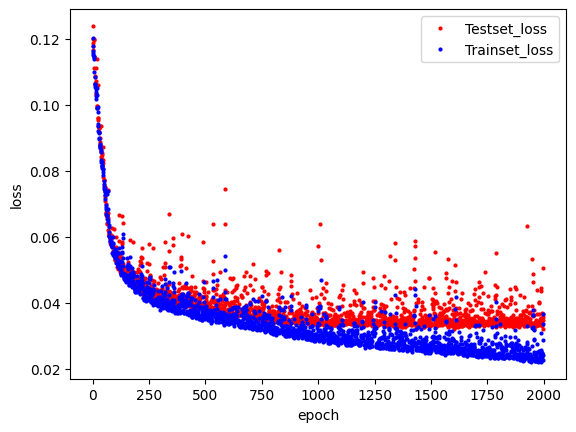

In [19]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 학습의 자동 중단 및 최적화 모델 저장

In [22]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer]) 

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7485 - loss: 3.3168 - val_accuracy: 0.7523 - val_loss: 2.4052
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7554 - loss: 2.1568 - val_accuracy: 0.7523 - val_loss: 1.4947
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7592 - loss: 1.3111 - val_accuracy: 0.7523 - val_loss: 0.8379
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7554 - loss: 0.6957 - val_accuracy: 0.7523 - val_loss: 0.3757
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7955 - loss: 0.3971 - val_accuracy: 0.8685 - val_loss: 0.3983
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8675 - loss: 0.3698 - val_accuracy: 0.8477 - val_loss: 0.3381
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8452 - loss: 0.3387 - val_accuracy: 0.8638 - val_loss: 0.3134
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8733 - loss: 0.3085 - val_accuracy: 0.8877 - va

8/8 [==============================] - 0s 5ms/step - loss: 0.1041 - accuracy: 0.9664 - val_loss: 0.0917 - val_accuracy: 0.9715
Epoch 118/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1027 - accuracy: 0.9646 - val_loss: 0.0965 - val_accuracy: 0.9723
Epoch 119/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1030 - accuracy: 0.9654 - val_loss: 0.0916 - val_accuracy: 0.9731
Epoch 120/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1021 - accuracy: 0.9659 - val_loss: 0.0908 - val_accuracy: 0.9723
Epoch 121/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1014 - accuracy: 0.9648 - val_loss: 0.0928 - val_accuracy: 0.9746
Epoch 122/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1014 - accuracy: 0.9666 - val_loss: 0.0926 - val_accuracy: 0.9738
Epoch 123/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1004 - accuracy: 0.9669 - val_loss: 0.0910 - val_accuracy: 0.9754
Epoch 124/2000
8/8 [=

Epoch 175/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0798 - accuracy: 0.9723 - val_loss: 0.0766 - val_accuracy: 0.9792
Epoch 176/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0789 - accuracy: 0.9743 - val_loss: 0.0774 - val_accuracy: 0.9792
Epoch 177/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0791 - accuracy: 0.9733 - val_loss: 0.0779 - val_accuracy: 0.9777
Epoch 178/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0809 - accuracy: 0.9743 - val_loss: 0.0786 - val_accuracy: 0.9792
Epoch 179/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0804 - accuracy: 0.9749 - val_loss: 0.0811 - val_accuracy: 0.9777
Epoch 180/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0797 - accuracy: 0.9749 - val_loss: 0.0759 - val_accuracy: 0.9785
Epoch 181/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0780 - accuracy: 0.9736 - val_loss: 0.0759 - val_accuracy: 0.9792
Epoch 

Epoch 233/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0655 - accuracy: 0.9777 - val_loss: 0.0760 - val_accuracy: 0.9762
Epoch 234/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0747 - accuracy: 0.9738 - val_loss: 0.0866 - val_accuracy: 0.9746
Epoch 235/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 0.9710 - val_loss: 0.0723 - val_accuracy: 0.9808
Epoch 236/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0686 - accuracy: 0.9777 - val_loss: 0.0687 - val_accuracy: 0.9800
Epoch 237/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0638 - accuracy: 0.9787 - val_loss: 0.0685 - val_accuracy: 0.9808
Epoch 238/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0628 - accuracy: 0.9772 - val_loss: 0.0684 - val_accuracy: 0.9800
Epoch 239/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0626 - accuracy: 0.9792 - val_loss: 0.0687 - val_accuracy: 0.9808
Epoch 

Epoch 291/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0575 - accuracy: 0.9805 - val_loss: 0.0648 - val_accuracy: 0.9815
Epoch 292/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0561 - accuracy: 0.9813 - val_loss: 0.0648 - val_accuracy: 0.9823
Epoch 293/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0570 - accuracy: 0.9802 - val_loss: 0.0706 - val_accuracy: 0.9823
Epoch 294/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9813 - val_loss: 0.0698 - val_accuracy: 0.9808
Epoch 295/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0620 - accuracy: 0.9787 - val_loss: 0.0669 - val_accuracy: 0.9823
Epoch 296/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9810 - val_loss: 0.0654 - val_accuracy: 0.9815
Epoch 297/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0567 - accuracy: 0.9808 - val_loss: 0.0660 - val_accuracy: 0.9808
Epoch 

Epoch 349/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0655 - val_accuracy: 0.9838
Epoch 350/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 0.9831 - val_loss: 0.0659 - val_accuracy: 0.9838
Epoch 351/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0520 - accuracy: 0.9815 - val_loss: 0.0638 - val_accuracy: 0.9846
Epoch 352/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0498 - accuracy: 0.9833 - val_loss: 0.0639 - val_accuracy: 0.9823
Epoch 353/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0509 - accuracy: 0.9813 - val_loss: 0.0643 - val_accuracy: 0.9838
Epoch 354/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9823 - val_loss: 0.0633 - val_accuracy: 0.9854
Epoch 355/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0642 - val_accuracy: 0.9815
Epoch 

In [23]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9856 - loss: 0.0812 
Test accuracy: 0.983846127986908
